In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [3]:
month = date(2022, 9, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 9, 1), datetime.date(2022, 9, 30))

In [4]:
bom
eom

datetime.date(2022, 9, 1)

datetime.date(2022, 9, 30)

In [6]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)

df = pd.read_sql(sql, conn)
df


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-09-30" 
ORDER BY amount DESC



,date,amount,item,kind
0,2022-09-30,10000,Parent,Parent
1,2022-09-30,640,Internet Home,Communication
2,2022-09-30,420,Netflix,Edutainment
3,2022-09-30,340,Packt,Edutainment
4,2022-09-30,320,Telephone Dtac,Communication
5,2022-09-30,170,Google,Edutainment
6,2022-09-30,100,Apple,Edutainment
7,2022-09-30,70,Food,Food
8,2022-09-30,40,Apple,Edutainment


In [7]:
df.amount.sum()

12100

In [8]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)

df_eom = pd.read_sql(sql, conn)
df_eom


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-09-30" 
ORDER BY amount DESC



,date,amount,item,kind
0,2022-09-30,10000,Parent,Parent
1,2022-09-30,640,Internet Home,Communication
2,2022-09-30,420,Netflix,Edutainment
3,2022-09-30,340,Packt,Edutainment
4,2022-09-30,320,Telephone Dtac,Communication
5,2022-09-30,170,Google,Edutainment
6,2022-09-30,100,Apple,Edutainment
7,2022-09-30,70,Food,Food
8,2022-09-30,40,Apple,Edutainment


In [9]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)

df_t = pd.read_sql(sql, conn)
df_t.head()


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-09-01" AND "2022-09-30" 
ORDER BY date



,date,amount,item,kind
0,2022-09-03,175,Food,Food
1,2022-09-03,7920,Mother,Parent
2,2022-09-03,2000,Mother,Parent
3,2022-09-05,360,Food,Food
4,2022-09-12,10000,Funeral,Others


In [10]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple               140
Food               1775
Fuel               1330
Funeral           10000
Google              170
Internet Home       640
Mother             9920
Netflix             420
Packt               340
Parent            10000
Telephone Dtac      320
Transportation      290
Name: amount, dtype: int64

In [11]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Communication       960
Edutainment        1070
Food               1775
Others            10000
Parent            19920
Transportation     1620
Name: amount, dtype: int64

In [12]:
expense = grouped.amount.sum()
sum(expense)

35345

<Figure size 864x864 with 0 Axes>

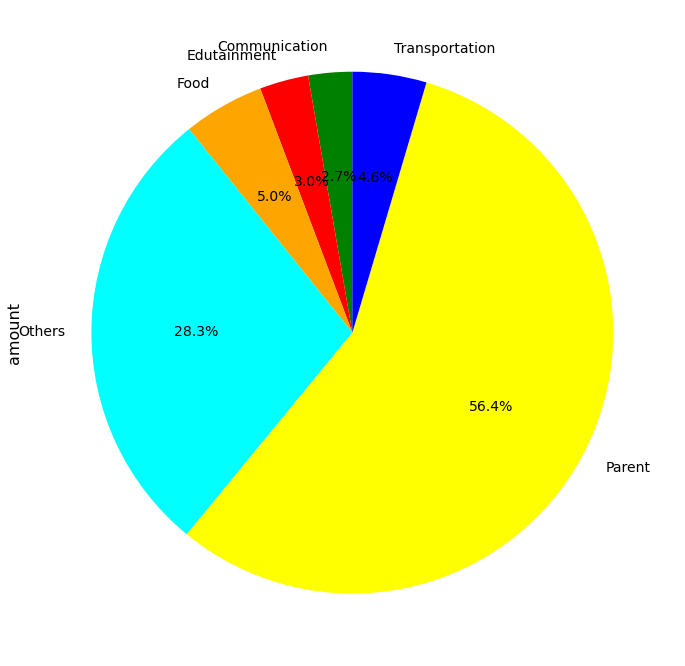

In [13]:
fig_path = "../fig/Expense-2209.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [14]:
expense.to_csv("../data/expense-2209.csv")

In [15]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-09-30" 
ORDER BY date



In [16]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [17]:
df_tmp.to_csv("../data/expense-eom.csv")